# IRIS Flower Classifiaction

<b>Task:</b>
- Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.

## Importing necessary libraries and loading dataset from sklearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

#### Exploring dataset

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### Creating a DataFrame

In [7]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [8]:
df['target'] = iris.target
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [9]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [10]:
df['Species'] = df.target.apply(lambda i: iris.target_names[i])
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target Species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa

In [11]:
df[df.target==0].head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target Species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa

In [12]:
df[df.target==1].head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
50                7.0               3.2                4.7               1.4   
51                6.4               3.2                4.5               1.5   
52                6.9               3.1                4.9               1.5   
53                5.5               2.3                4.0               1.3   
54                6.5               2.8                4.6               1.5   

    target     Species  
50       1  versicolor  
51       1  versicolor  
52       1  versicolor  
53       1  versicolor  
54       1  versicolor

In [13]:
df[df.target==2].head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
100                6.3               3.3                6.0               2.5   
101                5.8               2.7                5.1               1.9   
102                7.1               3.0                5.9               2.1   
103                6.3               2.9                5.6               1.8   
104                6.5               3.0                5.8               2.2   

     target    Species  
100       2  virginica  
101       2  virginica  
102       2  virginica  
103       2  virginica  
104       2  virginica

### Data Visualization

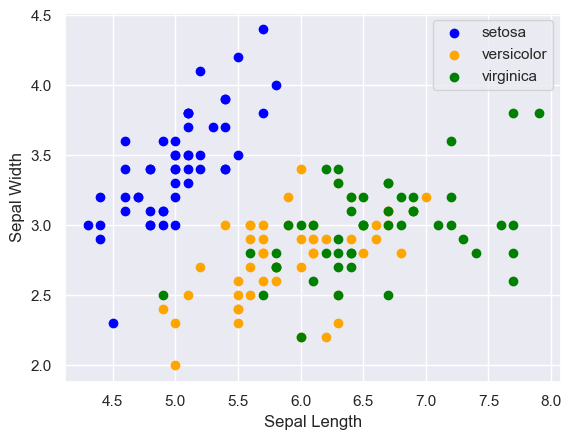

In [14]:
# Plotting sepal length (cm) vs sepal width (cm)
colors = ['blue', 'orange', 'green']
for i in range(3):
    x = df[df['Species'] == iris.target_names[i]]
    plt.scatter(x['sepal length (cm)'], x['sepal width (cm)'], c = colors[i], label=iris.target_names[i])

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

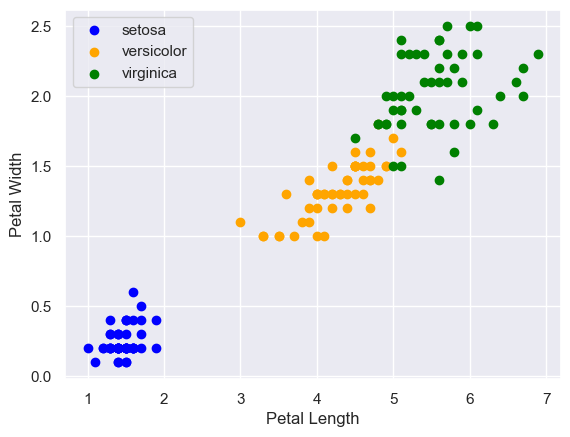

In [15]:
# Plotting petal length (cm) vs petal width (cm)
colors = ['blue', 'orange', 'green']
for i in range(3):
    x = df[df['Species'] == iris.target_names[i]]
    plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c = colors[i], label=iris.target_names[i])

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

### Spliting Dataset

In [16]:
X = df.drop(['target', 'Species'], axis=1)
X.sample(5)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
51                 6.4               3.2                4.5               1.5
86                 6.7               3.1                4.7               1.5
30                 4.8               3.1                1.6               0.2
110                6.5               3.2                5.1               2.0
112                6.8               3.0                5.5               2.1

In [17]:
y = df.Species
y.sample(9)

130     virginica
30         setosa
96     versicolor
87     versicolor
126     virginica
56     versicolor
70     versicolor
117     virginica
143     virginica
Name: Species, dtype: object

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [19]:
len(x_train)

112

In [20]:
len(y_train)

112

In [21]:
len(x_test)

38

### Training the Model

In [22]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')

In [23]:
model.fit(x_train, y_train)

SVC()

In [24]:
model.score(x_test, y_test)

0.9736842105263158

In [25]:
model.predict(x_test)

array(['setosa', 'setosa', 'virginica', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'setosa', 'virginica', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'virginica'], dtype=object)

### Confusion Matrix 
<b>(To represent the accuracy of the Model)</b>

In [26]:
from sklearn.metrics import confusion_matrix

pred = model.predict(x_test)

# confusion_matrix(truth, prediction)
cm = confusion_matrix(y_test, pred)
cm

array([[16,  0,  0],
       [ 0, 11,  1],
       [ 0,  0, 10]], dtype=int64)

Text(29.75, 0.5, 'Truth')

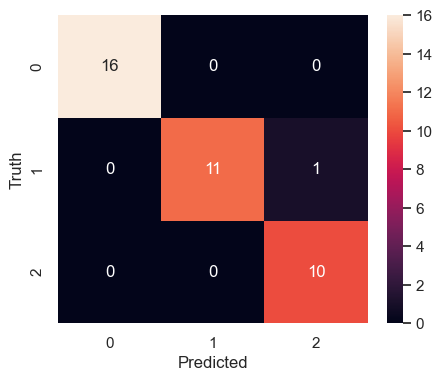

In [27]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Showing Classification report

In [28]:
from sklearn.metrics import classification_report
print('Classification Report:\n')
print(classification_report(y_test, pred))

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.92      0.96        12
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [29]:
print('Accuracy of the Model: ', model.score(x_test, y_test))

Accuracy of the Model:  0.9736842105263158


In [30]:
model.predict([[4.7, 3.2, 1.3, 0.2]])

array(['setosa'], dtype=object)

In [31]:
model.predict([[7.1, 3.0, 5.9, 1.5]])

array(['virginica'], dtype=object)